## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Importing needed modules, libraries ...

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns

## Data import

In [44]:
df = pd.read_csv('kc_house_data.csv')

## Data Exploration

In [45]:
# how many data points(rows)? How many variables (columns)?
df.shape

(21597, 21)

In [46]:
#loking at  the first rows
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Intermediary conclusion  
Target variable (i.e. independent variable) = 'price'  
Confirmed by description of the column names found in file column_names.md

20 potential descriptors

# PHASE 1. FAST TRACK.  
Goal: Get a preliminary model fast

## looking for non-numerical data 

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [48]:
# columns 'date' and 'sqft_basement' are non numerical
# what is the data type of sqft_basement?
type(df['sqft_basement'][0])

str

In [49]:
# checking unique values of column sqft_basement
np.sort(df['sqft_basement'].unique())

array(['0.0', '10.0', '100.0', '1000.0', '1008.0', '1010.0', '1020.0',
       '1024.0', '1030.0', '1040.0', '1050.0', '1060.0', '1070.0',
       '1080.0', '1090.0', '110.0', '1100.0', '1110.0', '1120.0',
       '1130.0', '1135.0', '1140.0', '1150.0', '1160.0', '1170.0',
       '1180.0', '1190.0', '120.0', '1200.0', '1210.0', '1220.0',
       '1230.0', '1240.0', '1245.0', '1248.0', '1250.0', '1260.0',
       '1270.0', '1275.0', '1280.0', '1281.0', '1284.0', '1290.0',
       '130.0', '1300.0', '1310.0', '1320.0', '1330.0', '1340.0',
       '1350.0', '1360.0', '1370.0', '1380.0', '1390.0', '140.0',
       '1400.0', '1410.0', '1420.0', '143.0', '1430.0', '1440.0', '145.0',
       '1450.0', '1460.0', '1470.0', '1480.0', '1481.0', '1490.0',
       '150.0', '1500.0', '1510.0', '1520.0', '1525.0', '1530.0',
       '1540.0', '1548.0', '1550.0', '1560.0', '1570.0', '1580.0',
       '1590.0', '160.0', '1600.0', '1610.0', '1620.0', '1630.0',
       '1640.0', '1650.0', '1660.0', '1670.0', '1680.0',

In [50]:
# column sqft_basement has a question mark !!
# let's drop it for now
df.drop('sqft_basement',axis =1,inplace = True)

In [51]:
# check date column. type?
print(df.date[0])
type(df.date[0])


10/13/2014


str

In [52]:
# change date type to datetime
df['date']=pd.to_datetime(df['date'])

In [53]:
# checking  datetime type
df['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

## Looking for NaN values


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11)
memory usage: 3.3 MB


In [55]:
# NaN values issues with waterfront, view, yr_renovated
# for now we will drop these columns
df=df.drop(['waterfront', 'view', 'yr_renovated'],axis = 1)

In [56]:
# check 3 columns less. Total of columns = 17. 16 predictors and 1 target
df.shape

(21597, 17)

In [57]:
# check we don't have any NaN values left
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
yr_built         21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(11)
memory usage: 2.8 MB


## Looking for categorical data

number of predictors:  15
predictors:  ['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


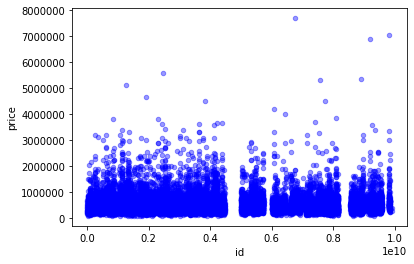

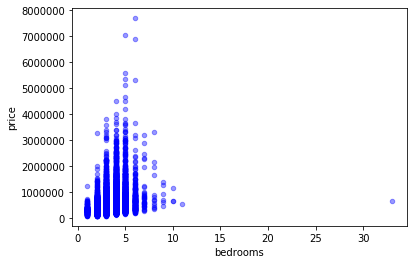

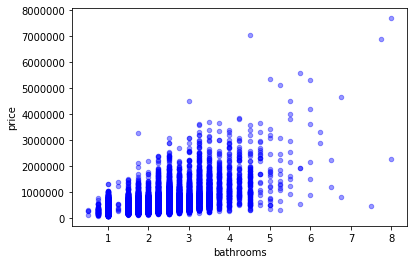

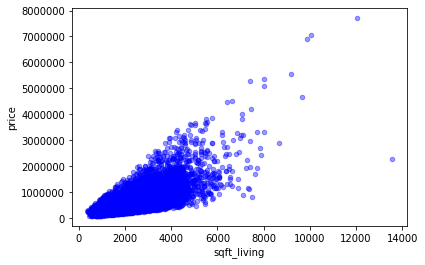

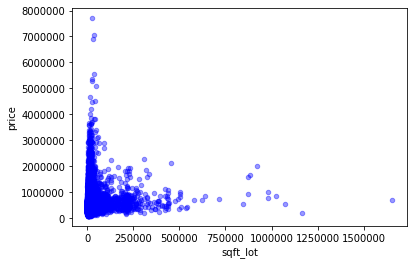

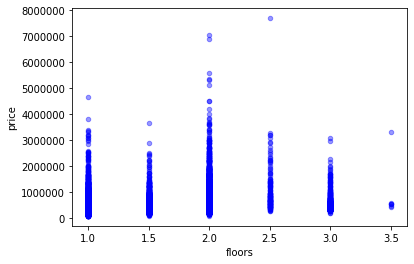

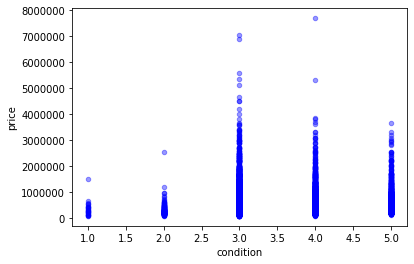

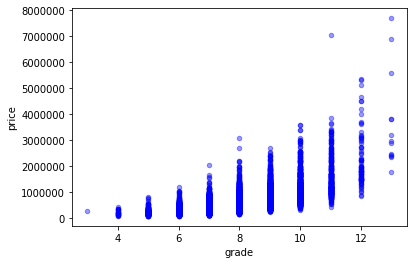

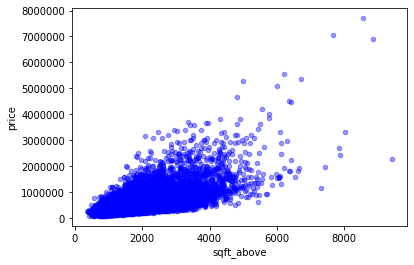

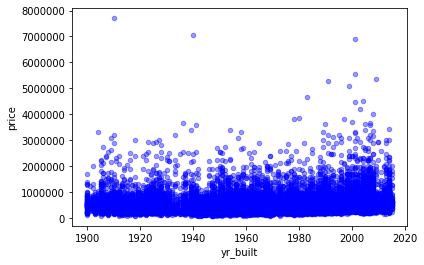

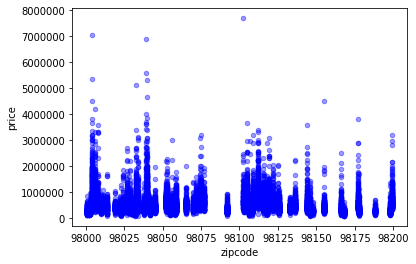

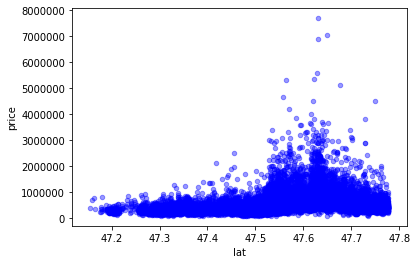

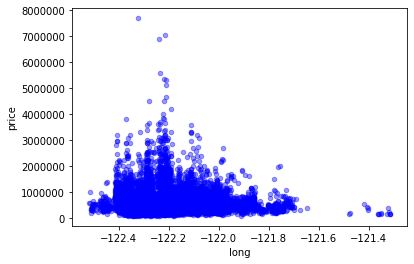

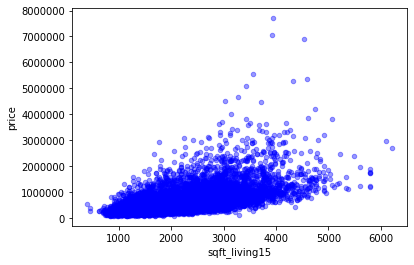

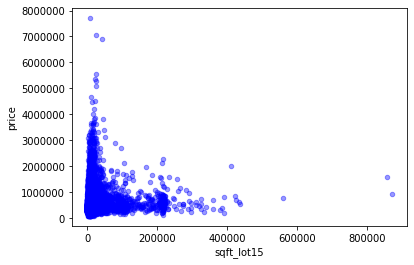

In [58]:
# scatterplot of price vs. each variable

%matplotlib inline

# list of 15 predictors (x)
listx = list(df.columns.drop('price').drop('date'))
print('number of predictors: ', len(listx))
print('predictors: ',listx)

for elem in listx:
    df.plot(kind = 'scatter', x = elem, y = 'price',
            alpha=0.4, color= 'b')
    plt.show();
    


## Intermediary conclusion:  
id and zipcode seem to be the only truly categorical variables.  
But we also have discrete variables (condition, numbers of rooms...)  
id is an identifier, we can drop it.  
We'll drop zipcode for now.  

In [59]:
# let's also drop date for now 
df= df.drop(['id','date','zipcode'],axis = 1)

In [60]:
# check
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,1955,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,1951,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,1933,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,1965,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,1987,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,3,8,1530,2009,47.6993,-122.346,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,3,8,2310,2014,47.5107,-122.362,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,3,7,1020,2009,47.5944,-122.299,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,3,8,1600,2004,47.5345,-122.069,1410,1287


## Train - Test Split

In [72]:
X= df.drop(['price'],axis=1)
y=df['price']

linreg = LinearRegression()
# Split the data randomly into training and test sets. 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

# check sizes
print( [ t.shape[:] for t in [X_train,X_test,y_train,y_test]])
print( X_test.shape[0]/( X_train.shape[0]+X_test.shape[0] ) )

[(17277, 13), (4320, 13), (17277,), (4320,)]
0.2000277816363384


## Multiple linear regression

In [73]:

X_train_int = sm.add_constant(X_train)  # contains all predictors and a constant column =1 for intercept
model = sm.OLS(y_train,X_train_int).fit() # y_train is a one column dataframe containing the dependent variable
model.summary()

C:\Users\poari\Anaconda3\envs\learn-env\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     2599.
Date:                Thu, 02 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:21:48   Log-Likelihood:            -2.3637e+05
No. Observations:               17277   AIC:                         4.728e+05
Df Residuals:                   17263   BIC:                         4.729e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.073e+07   1.85e+06    -21.994      0.000   -4.44e+07   -3.71e+07
bedrooms      -4.887e+04   2312.220    -21.138      0.000   -5.34e+04   -4.43e+04
bathrooms      5.004e+04   3800.839     13.165      0.000    4.26e+04    5.75e+04
sqft_living     174.2158      5.116     34.056      0.000     164.189     184.243
sqft_lot          0.0969      0.056      1.731      0.083      -0.013       0.207
floors         5843.2173   4218.609      1.385      0.166   -2425.684    1.41e+04
condition      3.174e+04   2708.989     11.716      0.000    2.64e+04     3.7e+04
grade          1.036e+05   2539.558     40.778      0.000    9.86e+04    1.09e+05
sqft_above       12.2102      5.085      2.401      0.016       2.244      22.176
yr_built      -2866.8818     79.691    -35.975      0.000   -3023.084   -2710.680
lat            5.186e+05   1.23e+04     42.270      0.000    4.95e+05    5.43e+05
long          -1.714e+05   1.39e+04    -12.323      0.000   -1.99e+05   -1.44e+05
sqft_living15    41.8241      4.001     10.453      0.000      33.981      49.667
sqft_lot15       -0.2784      0.085     -3.263      0.001      -0.446      -0.111
==============================================================================
Omnibus:                    14908.177   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1233754.310
Skew:                           3.727   Prob(JB):                         0.00
Kurtosis:                      43.722   Cond. No.                     5.94e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.94e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Fast track QC 


In [78]:
# prediction for test  and training set:
X_test_int = sm.add_constant(X_test) # adds a constant column =1 for intercept (similar to X_train_int)
y_hat_test = model.predict(X_test_int)
y_hat_train = model.predict(X_train_int)

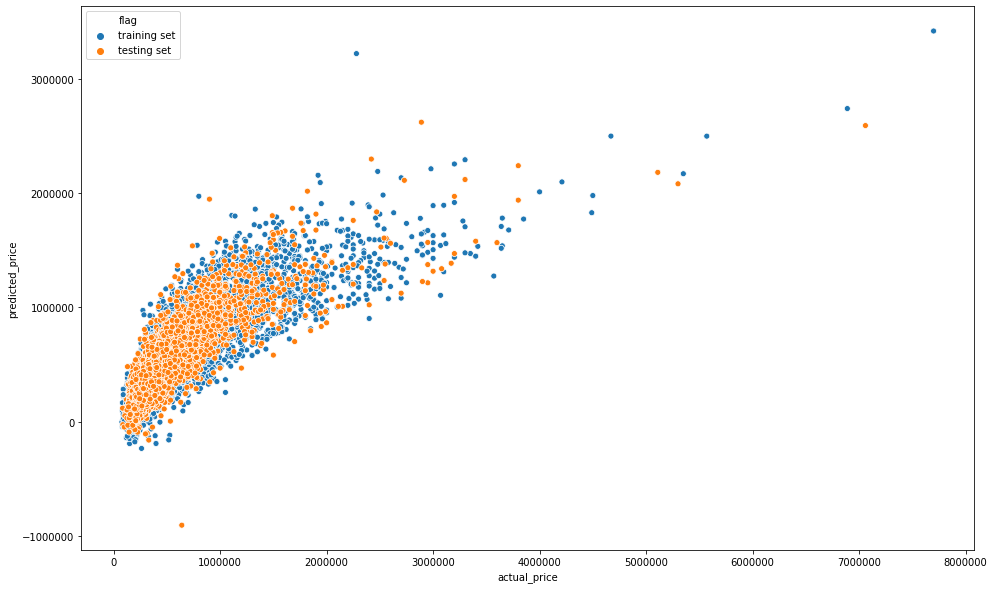

In [144]:
# visualization of residuals

# conversion of results for training set into a dataframe
y_train_df = pd.DataFrame(y_train)
y_hat_train_df = pd.DataFrame(y_hat_train)
y_train_df=pd.concat([y_train_df,y_hat_train_df],axis=1)
y_train_df.columns = ['actual_price','predicted_price']
y_train_df['flag']='training set'

# conversion of results for test set into a dataframe
y_test_df = pd.DataFrame(y_test)
y_hat_test_df = pd.DataFrame(y_hat_test)
y_test_df=pd.concat([y_test_df,y_hat_test_df],axis=1)
y_test_df.columns = ['actual_price','predicted_price']
y_test_df['flag']='testing set'

# putting together the training and test sets
y_plot = pd.concat ([y_train_df,y_test_df],axis = 0)

# scatter plot of training and test sets' predictions vs. actuals
plt.figure(figsize=(16,10))
sns.scatterplot(x='actual_price', y='predicted_price',hue ='flag',data=y_plot )
plt.show();

In [145]:
res_test=y_hat_test-y_test
res_train=y_hat_train-y_train

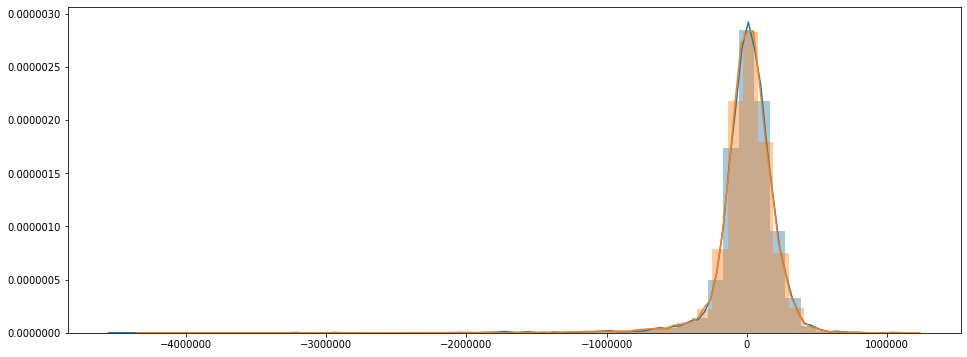

In [146]:
plt.figure(figsize=(16,6))
sns.distplot( res_test )
sns.distplot( res_train )
plt.show();

In [149]:

# Calculate mean square errors
train_mse = mean_squared_error(y_train,y_hat_train)
test_mse = mean_squared_error(y_test,y_hat_test) 
print ('train_mse :',train_mse)
print ('test_mse :',test_mse)
print ('difference (in %):  ', 100*(abs(train_mse-test_mse)) / np.mean([train_mse,test_mse]))

train_mse : 44746626239.32107
test_mse : 52051762151.50348
difference (in %):   15.09350730652218


## Fast Track Conclusions  
  
  
## Notes for final work

